### Kevyn Kelso
### ECE 5625
### Homework 3
Problems: 2.24, 2.28, 2.30, 2.39, 2.44, 2.50

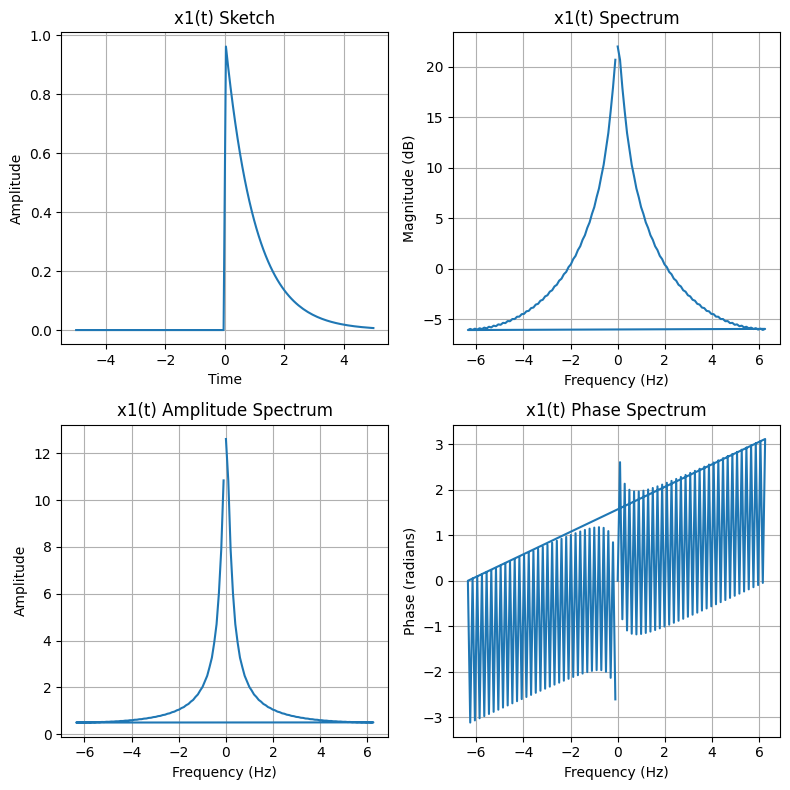

In [38]:
# Question 2.24
# Sketch each signal given below and find its Fourier
# transform. Plot the amplitude and phase spectra of each
# signal (𝐴 and 𝜏 are positive constants).
# (a) 𝑥1(𝑡) = 𝐴 exp (−𝑡∕𝜏) 𝑢(𝑡)
# (b) 𝑥2 (𝑡) = 𝐴 exp (𝑡∕𝜏) 𝑢(−𝑡)
# (c) 𝑥3(𝑡) = 𝑥1(𝑡) − 𝑥2 (𝑡)
# (d) 𝑥4(𝑡) = 𝑥1(𝑡) + 𝑥2 (𝑡). Does the result check with
# the answer found using Fourier-transform tables?
# (e) 𝑥5 (𝑡) = 𝑥1 (𝑡 − 5)
# (f) 𝑥6 (𝑡) = 𝑥1 (𝑡) − 𝑥1 (𝑡 − 5)

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fft import fft

def unit_step(n):
  """
  Returns 1 if n >= 0, otherwise returns 0.
  """
  return 1 if n >= 0 else 0

def compute_spectra(X):
    amplitude = np.abs(X)
    phase = np.angle(X)
    return amplitude, phase

# (a) 𝑥1(𝑡) = 𝐴 exp (−𝑡∕𝜏) 𝑢(𝑡)
amplitude = 1
tau = 1
tt = np.linspace(-5,5,128)
def x1(t):
    return amplitude * np.exp(-t/tau) * unit_step(t)

x1_vals = [x1(t) for t in tt]
x1_fft = fft(x1_vals)
mag_db = 20*np.log10(np.abs(x1_fft))
delta_t = tt[1] - tt[0]
freq = np.fft.fftfreq(len(x1_vals), d=delta_t)
# Signal sketch and Fourier transform
def signal_sketch(tt, x_vals, x1_fft, freq, mag_db, name):
    plt.figure(figsize=(8, 8))
    plt.subplot(221)
    plt.plot(tt, x_vals)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title(f"{name} Sketch")
    plt.grid()
    plt.subplot(222)
    plt.plot(freq, mag_db)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.title(f"{name} Spectrum")
    plt.grid()
    # amplitude and phase spectrum plots
    amplitude, phase = compute_spectra(x1_fft)
    plt.subplot(223)
    plt.plot(freq, amplitude)
    plt.title(f"{name} Amplitude Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.subplot(224)
    plt.plot(freq, phase)
    plt.title(f"{name} Phase Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Phase (radians)")
    plt.grid()
    plt.tight_layout()
    plt.show()

signal_sketch(tt, x1_vals, x1_fft, freq, mag_db, "x1(t)")



### (a)
$$x_1(t) = Aexp(-\frac{t}{\tau})u(t)$$
$$X_1(f) = \int_0^{\infty}Ae^{-t/\tau}e^{-j2\pi ft}dt$$
$$X_1(f) = A\int_0^{\infty}e^{-(1/\tau + j2\pi f)t}dt$$
$$X_1(f) = \frac{A}{1/\tau + j2\pi f}$$

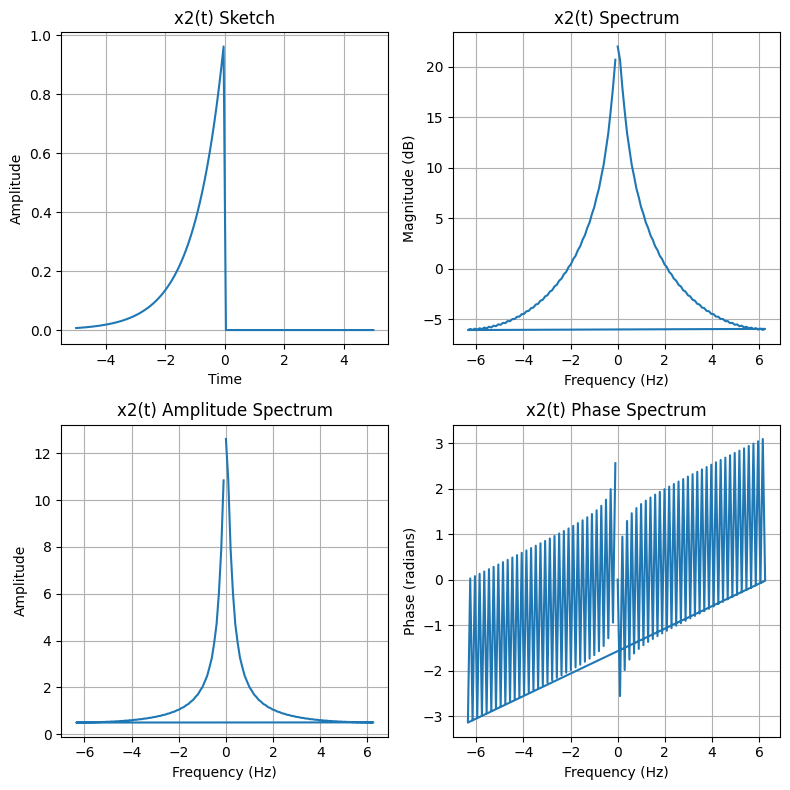

In [39]:
# (b) 𝑥2 (𝑡) = 𝐴 exp (𝑡∕𝜏) 𝑢(−𝑡)
def x2(t):
    return amplitude * np.exp(t / tau) * unit_step(-t)

x2_vals = [x2(t) for t in tt]
x2_fft = fft(x2_vals)
mag_db = 20*np.log10(np.abs(x2_fft))
delta_t = tt[1] - tt[0]
freq = np.fft.fftfreq(len(x2_vals), d=delta_t)
signal_sketch(tt, x2_vals, x2_fft, freq, mag_db, "x2(t)")


### (b)
$$x_2(t) = Aexp(\frac{t}{\tau})u(-t)$$
$$X_2(f) = \int_{-\infty}^{0}Ae^{t/\tau}e^{-j2\pi ft}dt$$
$$X_2(f) = A\int_{-\infty}^{0}e^{(1/\tau - j2\pi f)t}dt$$
$$X_2(f) = \frac{A}{1/\tau - j2\pi f}$$

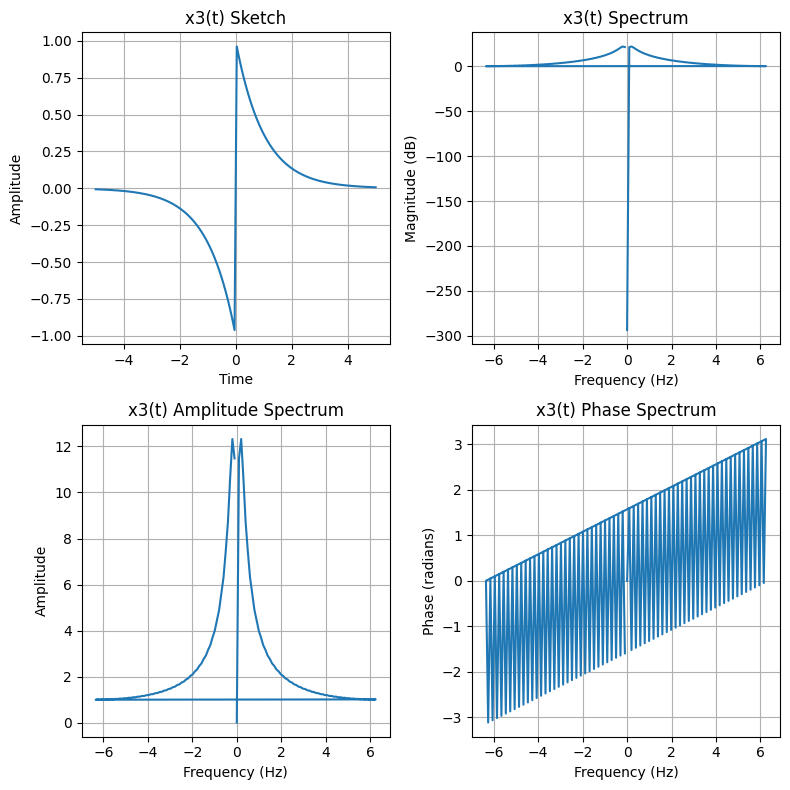

In [40]:
# (c) 𝑥3(𝑡) = 𝑥1(𝑡) − 𝑥2 (𝑡)
def x3(t):
    return x1(t) - x2(t)

x3_vals = [x3(t) for t in tt]
x3_fft = fft(x3_vals)
mag_db = 20*np.log10(np.abs(x3_fft))
delta_t = tt[1] - tt[0]
freq = np.fft.fftfreq(len(x3_vals), d=delta_t)
signal_sketch(tt, x3_vals, x3_fft, freq, mag_db, "x3(t)")

### (c)
$$x_3(t) = x_1(t) - x_2(t)$$
$$x_1(t) = Aexp(-\frac{t}{\tau})u(t)$$
$$x_2(t) = Aexp(\frac{t}{\tau})u(-t)$$
$$x_3(t) = Aexp(-\frac{t}{\tau})u(t) - Aexp(\frac{t}{\tau})u(-t)$$
$$X_3(f) = X_1(f) - X_2(f)$$
$$X_3(f) = \frac{A}{1/\tau + j2\pi f} - \frac{A}{1/\tau - j2\pi f}$$

/var/folders/p0/mbrlfmbd2ml9p1_zgn2byx2r0000gn/T/ipykernel_34424/2102799192.py:8: RuntimeWarning: divide by zero encountered in log10
  mag_db = 20*np.log10(np.abs(x4_fft))


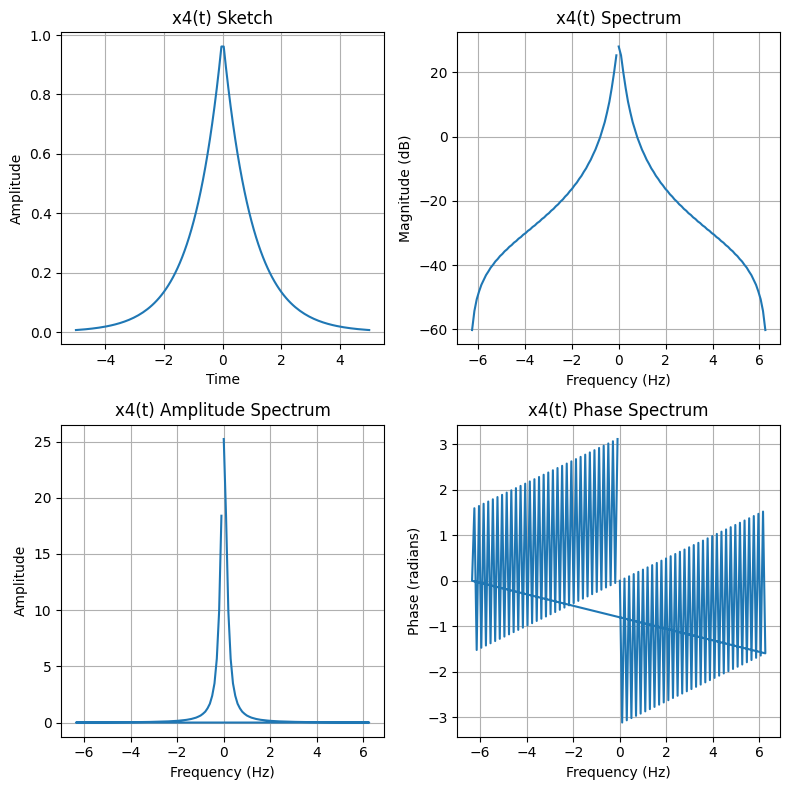

In [41]:
# (d) 𝑥4(𝑡) = 𝑥1(𝑡) + 𝑥2 (𝑡). Does the result check with
# the answer found using Fourier-transform tables?
def x4(t):
    return x1(t) + x2(t)

x4_vals = [x4(t) for t in tt]
x4_fft = fft(x4_vals)
mag_db = 20*np.log10(np.abs(x4_fft))
delta_t = tt[1] - tt[0]
freq = np.fft.fftfreq(len(x4_vals), d=delta_t)
signal_sketch(tt, x4_vals, x4_fft, freq, mag_db, "x4(t)")

$$X_4(f) = X_1(f) + X_2(f)$$
$$X_4(f) = \frac{A}{1/\tau + j2\pi f} + \frac{A}{1/\tau - j2\pi f}$$

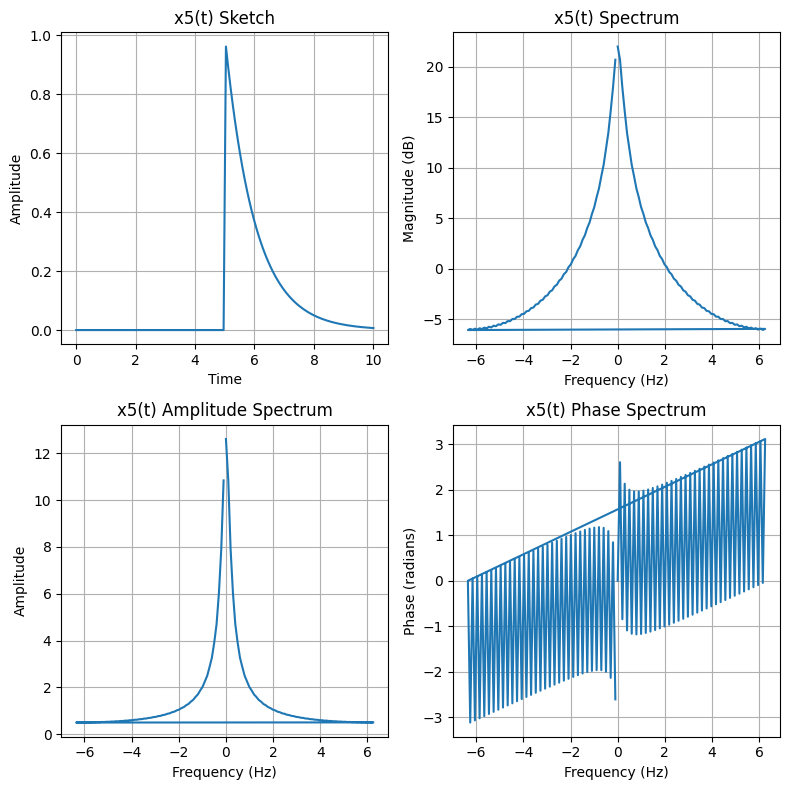

In [45]:
# (e) 𝑥5 (𝑡) = 𝑥1 (𝑡 − 5)
# tt redefined to center the time shifted x1 signal x5
tt = np.linspace(0,10,128)
def x5(t):
    return x1(t - 5)

x5_vals = [x5(t) for t in tt]
x5_fft = fft(x5_vals)
mag_db = 20*np.log10(np.abs(x5_fft))
delta_t = tt[1] - tt[0]
freq = np.fft.fftfreq(len(x5_vals), d=delta_t)
signal_sketch(tt, x5_vals, x5_fft, freq, mag_db, "x5(t)")

$$X_5(f) = X_1(f)e^{-j2\pi f*5}$$
$$X_5(f) = \frac{A}{1/\tau + j2\pi f}e^{-j10\pi f}$$

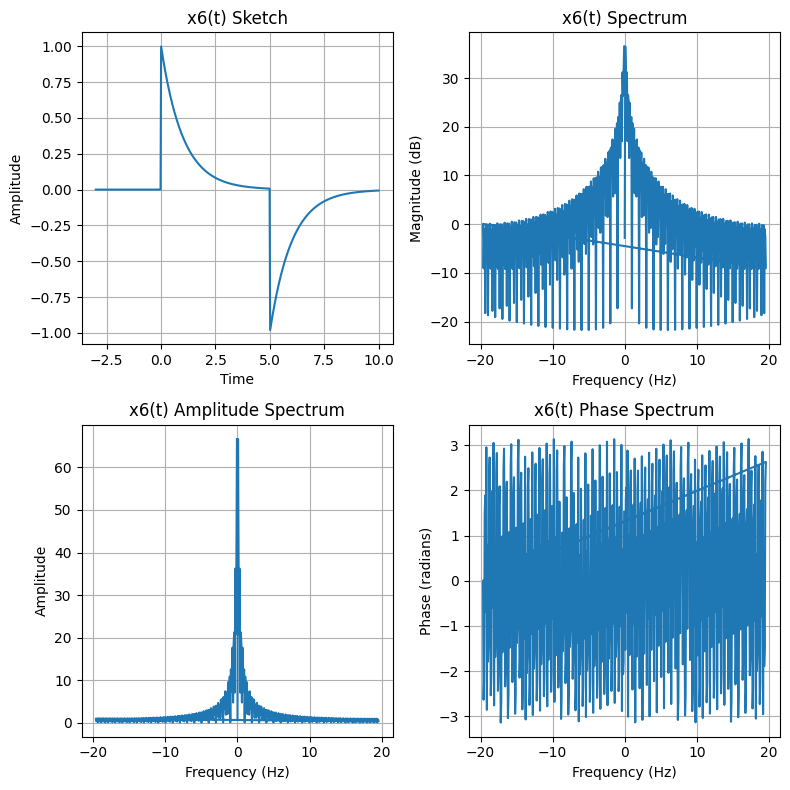

In [52]:
# (f) 𝑥6 (𝑡) = 𝑥1 (𝑡) − 𝑥1 (𝑡 − 5)
tt = np.linspace(-3,10,512)
def x6(t):
    return x1(t) - x1(t - 5)

x6_vals = [x6(t) for t in tt]
x6_fft = fft(x6_vals)
mag_db = 20*np.log10(np.abs(x6_fft))
delta_t = tt[1] - tt[0]
freq = np.fft.fftfreq(len(x6_vals), d=delta_t)
signal_sketch(tt, x6_vals, x6_fft, freq, mag_db, "x6(t)")

$$X_6(f) = X_1(f) - X_1(f)e^{-j10\pi f}$$
$$X_6(f) = X_1(f)(1 - e^{-j10\pi f})$$
$$X_6(f) = \frac{A}{1/\tau + j2\pi f}(1 - e^{-j10\pi f})$$

In [53]:
# Question 2.28
# (a) Given Π (𝑡) ⟷ sinc(𝑓 ), find the Fourier transforms of the following signals using the frequency-translation followed by the time-delay theorem.
# (i) 𝑥1 (𝑡) = Π(𝑡−1)exp[𝑗4𝜋(𝑡−1)] 
# (ii) 𝑥2 (𝑡) = Π(𝑡+1)exp[𝑗4𝜋(𝑡+1)]
# (b) Repeat the above, but now applying the time- delay theorem followed by the frequency- translation theorem.

### (a)
Time delay theorem
$$x(t - t_0) \leftrightarrow X(f)e^{-j2\pi t_0f}$$
Frequency translation theorem
$$x(t)e^{j2\pi f_0t} \leftrightarrow X(f - f_0)$$
(i)
$$x_1(t) = \Pi(t - 1)e^{j4\pi (t-1)}$$
Frequency translation:
$$e^{j4\pi (t-1)} = e^{j4\pi t}e^{-j4\pi} = e^{j4\pi t}$$
$$x_1(t) = \Pi(t - 1)e^{j4\pi t}$$
Applying frequency translation:
$$f_0 = 2$$
Fourier translation:
$$\Pi(t)e^{j4\pi t} \rightarrow sinc(f - 2)$$
Time delay:
$$t_0 = 1$$
$$\Pi(t - 1)e^{j4\pi t} = sinc(f - 2)e^{-j2\pi f*1}$$
Result:
$$X_1(f) = sinc(f - 2)e^{-j2\pi f}$$
(ii)
$$x_2(t) = \Pi(t+1)e^{j4\pi(t+1)}$$
$$e^{j4\pi(t+1)} = e^{j4\pi t}e^{j4\pi} = e^{j4\pi t}$$
$$x_2(t) = \Pi(t + 1)e^{j4\pi t}$$
Frequency translation:
$$f_0 = 2$$
$$\Pi(t)e^{j4\pi t} \rightarrow sinc(f - 2)$$
Time delay:
$$t_0 = -1$$
$$\Pi(t+1)e^{j4\pi t} = sinc(f - 2)e^{j2\pi f*1}$$
Result:
$$X_2(f) = sync(f - 2)e^{j2\pi f}$$


### (b)
(i)
$$x_1(t) = \Pi(t - 1)e^{j4\pi(t-1)}$$
Time delay:
$$t_0 = 1$$
$$x_1(t) = \Pi(t - 1)e^{-j2\pi f*1}$$
Frequency translation:
$$f_0 = 2$$
$$\Pi(t) \rightarrow sinc(f)$$
$$X_1(f) = sinc(f - 2)e^{-j2\pi f}$$
(ii)
$$x_2(t) = \Pi(t+1)e^{j4\pi(t+1)}$$
Time delay:
$$t_0 = -1$$
$$x_2(t) = \Pi(t+1)e^{j2\pi f*1}$$
Frequency translation:
$$f_0 = 2$$
$$X_2(t) = sinc(f - 2)e^{j2\pi f}$$

### Question 2.30
Use the superposition, scale-change, and time-delay theorems along with the transform pairs Π (𝑡) ⟷ sinc(𝑓 ), sinc(𝑡) ⟷ Π(𝑓), Λ(𝑡) ⟷sinc2 (𝑓), and sinc2 (𝑡) ⟷ Λ (𝑓 ) to find Fourier transforms of the following:

### (a)
$$x_1(t) = \Pi(\frac{t-1}{2})$$
$$x_1(t) = \Pi((t-1)\frac{1}{2})$$
scale change:
$$x(at) \leftrightarrow \frac{1}{|a|}X(\frac{f}{a})$$
$$a = 1/2$$
$$\Pi((1/2)t) \leftrightarrow 2sinc(2f)$$
time delay:
$$t_0 = 1$$
$$\boxed{X_1(f) = 2sinc(2f)e^{-j2\pi f}}$$

### (b)
$$x_2(t) = 2sinc[2(t-1)]$$
superposition:
$$2sinc(t) \leftrightarrow 2\Pi(f)$$
scale change:
$$a = 2$$
$$sinc(2t) \leftrightarrow \frac{1}{2}\Pi(\frac{f}{2})$$
time delay:
$$t_0 = 1$$
$$\boxed{X_2(f) = \Pi(\frac{f}{2})e^{-j2\pi f}}$$
### (c)
$$x_3(t) = \Lambda(\frac{t-2}{8})$$
$$x_3(t) = \Lambda(\frac{1}{8}(t-2))$$
scale change: a = 1/8, time delay: t0 = 2
Fourier transform pair:
$$\Lambda(t) \leftrightarrow sinc^2(f)$$
$$\boxed{X_3(f) = 8sinc^2(8f)e^{-j4\pi f}}$$

### (d)
$$x_4(t) = sinc^2(\frac{t-3}{4})$$
$$x_4(t) = sinc^2(\frac{1}{4}(t-3))$$
scale change: a = 1/4, time delay t0 = 3
$$\boxed{X_4(t) = 4\Lambda(4f)e^{-j6\pi f}}$$

### (e)
$$x_5(t) = 5sinc[2(t-1)] + 5sinc[2(t+1)]$$
time delay: 1, -1 respectively
scale change: a = 2 for both
superposition: amplitude scalar = 5 for both
$$\boxed{X_5(f) = \frac{5}{2}\Pi(\frac{f}{2})e^{-j2\pi f} + \frac{5}{2}\Pi(\frac{f}{2})e^{j2\pi f}}$$

### (f)
$$x_6(t) = 2\Lambda(\frac{t-2}{8}) + 2\Lambda(\frac{t+2}{8})$$
time delay: 2, and -2 respectively
scale change: a = 1/8 for both
amplitude scalar = 2 for both
$$\boxed{X_6(f) = 16sinc^2(8f)e^{-j4\pi f} + 16sinc^2(8f)e^{j4\pi f}}$$

## Question 2.39
Provide plots of the following functions of time and find their Fourier transforms. Tell which ones should be real and even functions of 𝑓 and which ones should be imaginary and odd functions of 𝑓. Do your results bear this out?
### (a)
$$x_1(t) = \Lambda(\frac{t}{2}) + \Pi(\frac{t}{2})$$
$$X_1(f) = 2sinc^2(2f) + 2sinc(2f)$$
The function is expected to be real and even because there are no imaginary components and x1(t) = x1(-t).

### (b)
$$x_2(t) = \Pi(\frac{t}{2}) - \Lambda(t)$$
$$X_2(f) = 2sinc(2f) - sinc^2(f)$$
The function is expected to be real and even because there are no imaginary components and x1(t) = x1(-t).

### (c)
$$x_3(t) = \Pi(t + \frac{1}{2}) - \Pi(t - \frac{1}{2})$$
$$X_3(f) = sinc(f)e^{j\pi f} - sinc(f)e^{-j\pi f}$$
$$X_3(f) = sinc(f)[e^{j\pi f} - e^{-j\pi f}]$$
Euler's formula:
$$e^{j\theta} - e^{-j\theta} = 2jsin(\theta)$$
$$X_3(f) = sinc(f)2jsin(\pi f)$$

The function is imaginary due to the 'j' component. The function is odd because:
$$X_3(-f) = sinc(-f)2jsin(\pi (-f)) = 2jsinc(f)(-sin(\pi f)) = -X_3(f)$$

### (d)
$$x_4(t) = \Lambda(t - 1) - \Lambda(t + 1)$$
$$X_4(f) = sinc^2(f)e^{-j2\pi f} - sinc^2(f)e^{j2\pi f}$$
$$X_4(f) = sinc^2(f)[e^{-j2\pi f} - e^{j2\pi f}]$$
Euler's formula:
$$e^{-j2\pi f} - e^{j2\pi f} = -2jsin(2\pi f)$$
$$X_4(f) = sinc^2(f)(-2jsin(2\pi f))$$

The function is imaginary due to the 'j' component. The function is odd because the sin component is odd.

### (e)
$$x_5(t) = \Lambda(t)sgn(t)$$
Fourier transform:
$$sgn(t) \leftrightarrow \frac{1}{j\pi f}$$
Convolution theorem:
$$X_5(f) = sinc^2(f) * \frac{1}{j\pi f}$$
Where '*' is the convolution operator.

The function is imaginary due to the 'j' component, and odd due to the signum component.

### (f)
$$x_6(t) = \Lambda(t)cos(2\pi t)$$
f0 = 1
$$X_6(f) = \frac{1}{2}[sinc^2(f - 1) + sinc^2(f + 1)]$$

Since sinc^2 is even, and there are no imaginary components, the function is expected to be real and even.

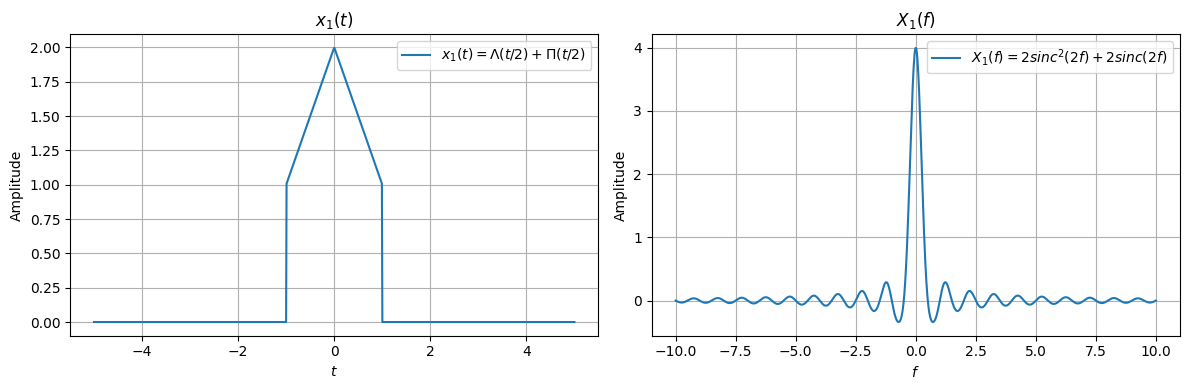

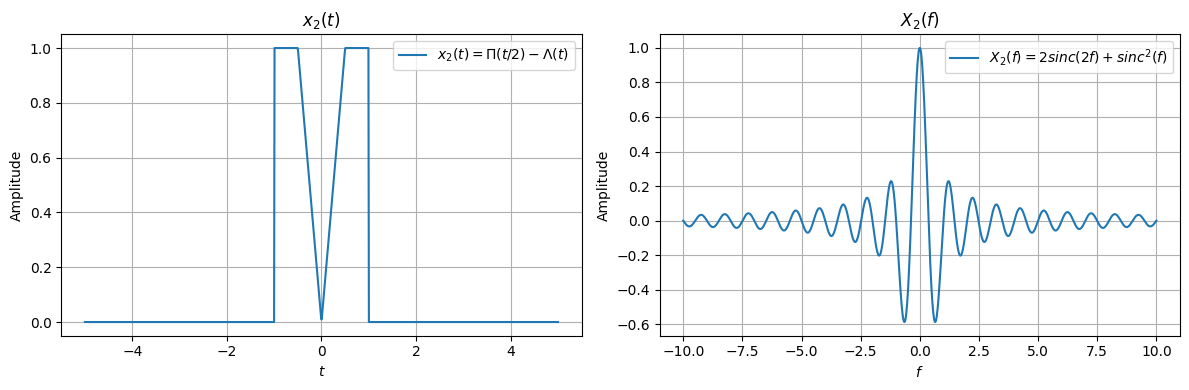

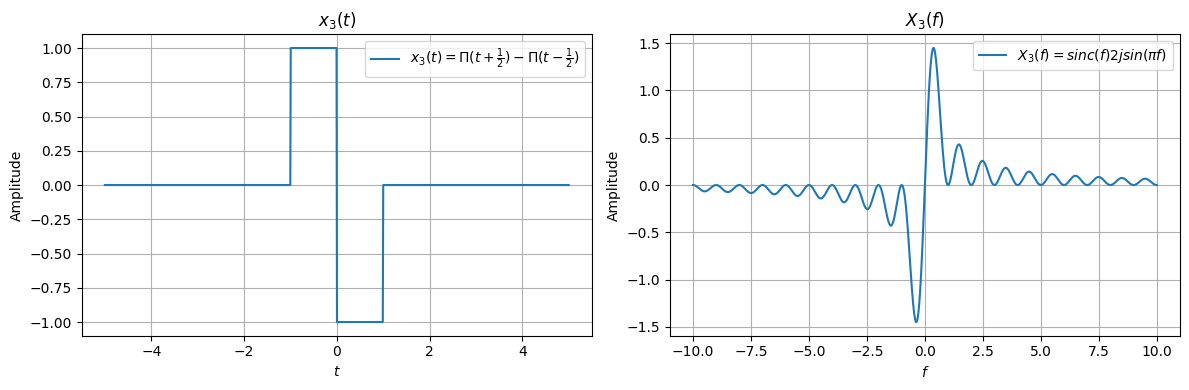

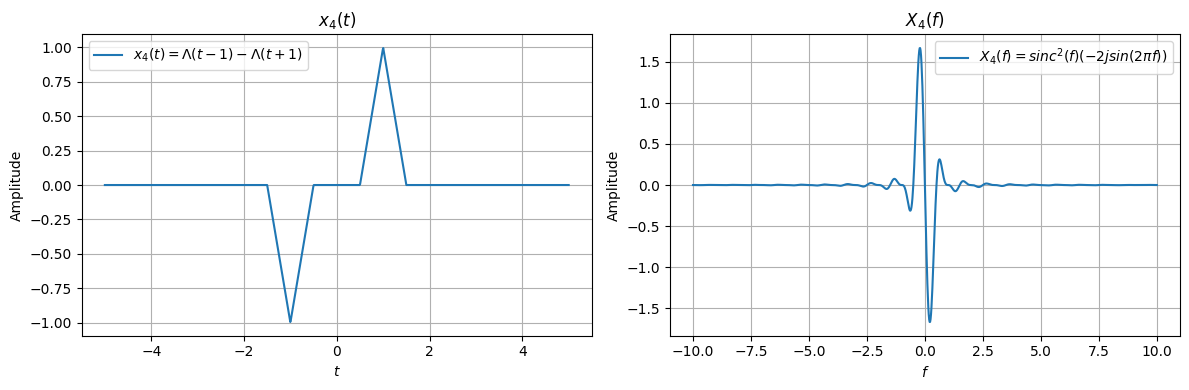

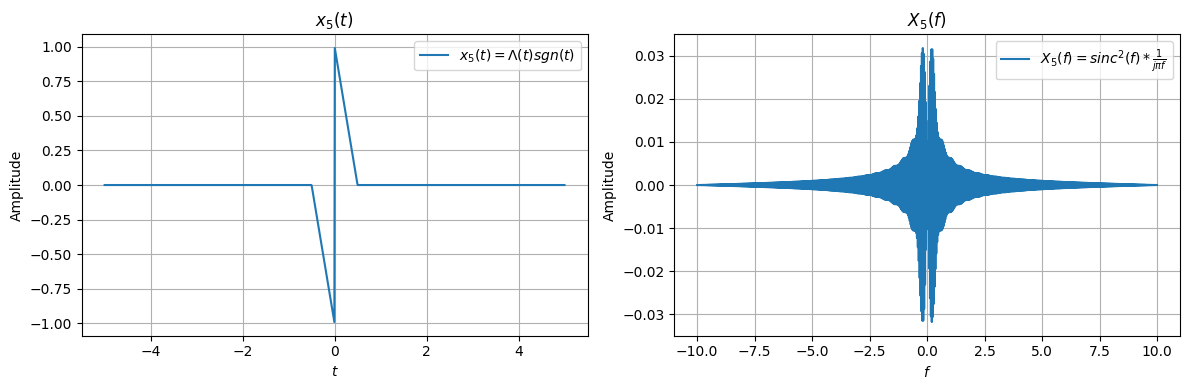

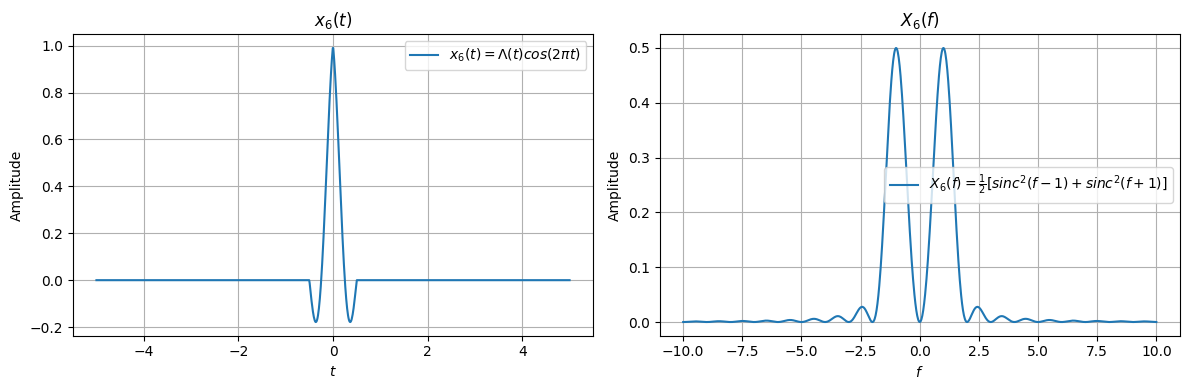

In [110]:
# (a)
tt = np.linspace(-5, 5, 1024)
x1_triangular = np.where(np.abs(tt) <= 1, 1-np.abs(tt), 0)
x1_square = np.where(np.abs(tt) <= 1, 1, 0)
x1 = x1_triangular + x1_square

f = np.linspace(-10, 10, 1024)
X1 = 2 * (np.sinc(2*f))**2 + 2 * np.sinc(2*f)

def plot_239(x, x_label, X, X_label, iteration):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(tt, x, label=x_label)
    plt.title(f'$x_{iteration}(t)$')
    plt.xlabel('$t$')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.legend()

    plt.subplot(122)
    plt.plot(f, X, label=X_label)
    plt.title(f"$X_{iteration}(f)$")
    plt.xlabel("$f$")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_239(x1, r'$x_1(t) = \Lambda(t/2) + \Pi(t/2)$', X1, r"$X_1(f) = 2sinc^2(2f) + 2sinc(2f)$", "1")

x2_triangular = np.where(np.abs(tt) <= 1/2, 1-2*np.abs(tt), 0)
x2_square = np.where(np.abs(tt) <= 1, 1, 0)
x2 = x2_square - x2_triangular

f = np.linspace(-10, 10, 1024)
X2 = 2 * (np.sinc(2*f)) - (np.sinc(f))**2

plot_239(x2, r'$x_2(t) = \Pi(t/2) - \Lambda(t)$', X2, r"$X_2(f) = 2sinc(2f) + sinc^2(f)$", "2")

# $X_3(f) = sinc(f)2jsin(\pi f)$
x3 = np.where(np.abs(tt + 0.5) <= 0.5, 1, 0) - np.where(np.abs(tt - 0.5) <= 0.5, 1, 0)
X3 = 2j * np.sinc(f) * np.sin(np.pi * f)

plot_239(x3, r'$x_3(t) = \Pi(t + \frac{1}{2}) - \Pi(t - \frac{1}{2})$', np.imag(X3), r"$X_3(f) = sinc(f)2jsin(\pi f)$", "3")

# $$x_4(t) = \Lambda(t - 1) - \Lambda(t + 1)$$
# $$X_4(f) = sinc^2(f)(-2jsin(2\pi f))$$
x4 = np.where(np.abs(tt-1) <= 0.5, 1 - 2*np.abs(tt-1), 0) - np.where(np.abs(tt+1) <= 0.5, 1 - 2*np.abs(tt+1), 0)
X4 = -2j*np.sin(2*np.pi*f)*((np.sinc(f))**2)

plot_239(x4, r'$x_4(t) = \Lambda(t - 1) - \Lambda(t + 1)$', np.imag(X4), r'$X_4(f) = sinc^2(f)(-2jsin(2\pi f))$', "4")

# $$x_5(t) = \Lambda(t)sgn(t)$$
# $$X_5(f) = sinc^2(f) * \frac{1}{j\pi f}$$
x5 = np.where(np.abs(tt) <= 0.5, 1-2*np.abs(tt), 0) * np.where(tt > 0, 1, np.where(tt < 0, -1, 0))
# X5 = np.convolve(np.sinc(f)**2, 1/(1j*np.pi*f)) # Note: we can't do this because the dimensions don't work, instead we will use scipy.
from scipy.fft import fft, fftshift
X5 = fftshift(fft(x5))
X5 = X5 / len(X5) # Normalize, helps keep the amplitude under control

plot_239(x5, r'$x_5(t) = \Lambda(t)sgn(t)$', np.imag(X5), r'$X_5(f) = sinc^2(f) * \frac{1}{j\pi f}$', "5")

# $$x_6(t) = \Lambda(t)cos(2\pi t)$$
# $$X_6(f) = \frac{1}{2}[sinc^2(f - 1) + sinc^2(f + 1)]$$

x6 = np.where(np.abs(tt) <= 0.5, 1-2*np.abs(tt), 0) * np.cos(2*np.pi*tt)
X6 = 0.5*(np.sinc(f - 1)**2 + np.sinc(f + 1)**2)

plot_239(x6, r'$x_6(t) = \Lambda(t)cos(2\pi t)$', X6, r'$X_6(f) = \frac{1}{2}[sinc^2(f - 1) + sinc^2(f + 1)]$', "6")



### Question 2.44
Find the autocorrelation functions corresponding to the following signals.
- (a) 𝑥1(𝑡) = 2cos(10𝜋𝑡+𝜋∕3)
  
Autocorrelation of cos:
$$R_{x}(\tau) = \frac{A^2}{2}cos(\omega \tau)$$
$$R_{x1}(\tau) = \frac{2^2}{2}cos(10\pi \tau)$$
$$\boxed{R_{x1}(\tau) = 2cos(10\pi \tau)}$$
- (b) 𝑥2(𝑡) = 2sin(10𝜋𝑡+𝜋∕3)
$$\boxed{R_{x2}(\tau) = 2cos(10\pi \tau)}$$
- (c) 𝑥3(𝑡) = Re[3exp (𝑗10𝜋𝑡) + 4𝑗 exp (𝑗10𝜋𝑡)]
$$x_3(t) = Re[(3 + 4j)e^{10\pi t}]$$
$$x_3(t) = Re[5e^{j\theta}e^{j10\pi t}]$$
$$x_3(t) = 5cos(10\pi t + \theta)$$
$$\boxed{R_{x3}(\tau) = \frac{25}{2}cos(10\pi \tau)}$$
- (d) 𝑥4(𝑡) = 𝑥1(𝑡)+𝑥2(𝑡)
$$x_4(t) = 2cos(10\pi t + \frac{\pi}{3}) + 2sin(10\pi t + \frac{\pi}{3})$$
$$R_{x4}(\tau) = 2cos(10\pi \tau) + 2cos(10\pi \tau)$$
$$\boxed{R_{x4}(\tau) = 4cos(10\pi \tau)}$$

### Question 2.50
For the two circuits shown in Figure 2.38, deter- mine 𝐻 (𝑓 ) and h(𝑡). Sketch accurately the amplitude and phase responses. Plot the amplitude response in decibels. Use a logarithmic frequency axis.

#### Circuit 1 (left)
$$H(f) = \frac{R_2 + j2\pi f L}{R_1 + R_2 + j2\pi f L}$$
$$h(t) = \delta(t) - \frac{R_1}{R_1 + R_2}e^{-\frac{R_1 + R_2}{L}t}u(t)$$

#### Circuit 2 (right)
$$H(f) = \frac{\frac{R_2j2\pi f L}{R_2 + j2\pi f L}}{R_1 + \frac{R_2j2\pi f L}{R_2 + j2\pi f L}}$$